In [ ]:
!cd /media/extra/DATA/IBI/IBI60-CJM165-S
!ncrcat IBI60-CJM165_y2013m01d??.1h_gridT.nc IBI60-CJM165_y2013m01.1h_gridT.nc
!ncks -d time_counter,12,743 IBI60-CJM165_y2013m01.1h_gridT.nc IBI60-CJM165_y2013m01.1h_gridT_apres12h.nc
!ncks -d time_counter,1,732 IBI60-CJM165_y2013m01.1h_gridT.nc IBI60-CJM165_y2013m01.1h_gridT_avant12h.nc
!ncdiff IBI60-CJM165_y2013m01.1h_gridT_apres12h.nc IBI60-CJM165_y2013m01.1h_gridT_avant12h.nc IBI60-CJM165_y2013m01.1h_gridT_diff12h.nc
!ncks -d time_counter,13,743 IBI60-CJM165_y2013m01.1h_gridT.nc IBI60-CJM165_y2013m01.1h_gridT_apres13h.nc


In [1]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
sys.path.insert(0,'/home/albert7a/lib/python/cartopy/lib/cartopy')
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import datetime
import matplotlib.dates as mdates

%matplotlib inline


/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [12]:
dir12='/media/extra/DATA/IBI/IBI12.L75-MAA13-S/'
file12diff12h='IBI12.L75-MAA13_y2013m01.1h_SSH_diff12h.nc'
tfile12diff12h=dir12+file12diff12h
ds12diff12h=xr.open_dataset(tfile12diff12h)

file12diff13h='IBI12.L75-MAA13_y2013m01.1h_SSH_diff13h.nc'
tfile12diff13h=dir12+file12diff13h
ds12diff13h=xr.open_dataset(tfile12diff13h)

In [13]:
lon12=ds12.nav_lon
lat12=ds12.nav_lat
diff12hssh12=ds12diff12h.sossheig
diff13hssh12=ds12diff13h.sossheig

In [4]:
def plot_ibi_mercator(fig,sub,var,lat,lon,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.Mercator())
        cmap = plt.get_cmap(pal)
        ax.set_extent([-20, 12, 28, 66])
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines(resolution='50m')
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-24,-18,-12,-6,0,6,12,18,24])
        gl.ylocator = mticker.FixedLocator([20,24,28,32,36,40,44,48,52,56,60,64,68,72])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False

        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label=unit)
        ax.set_title(name,size=17,y=1.08)


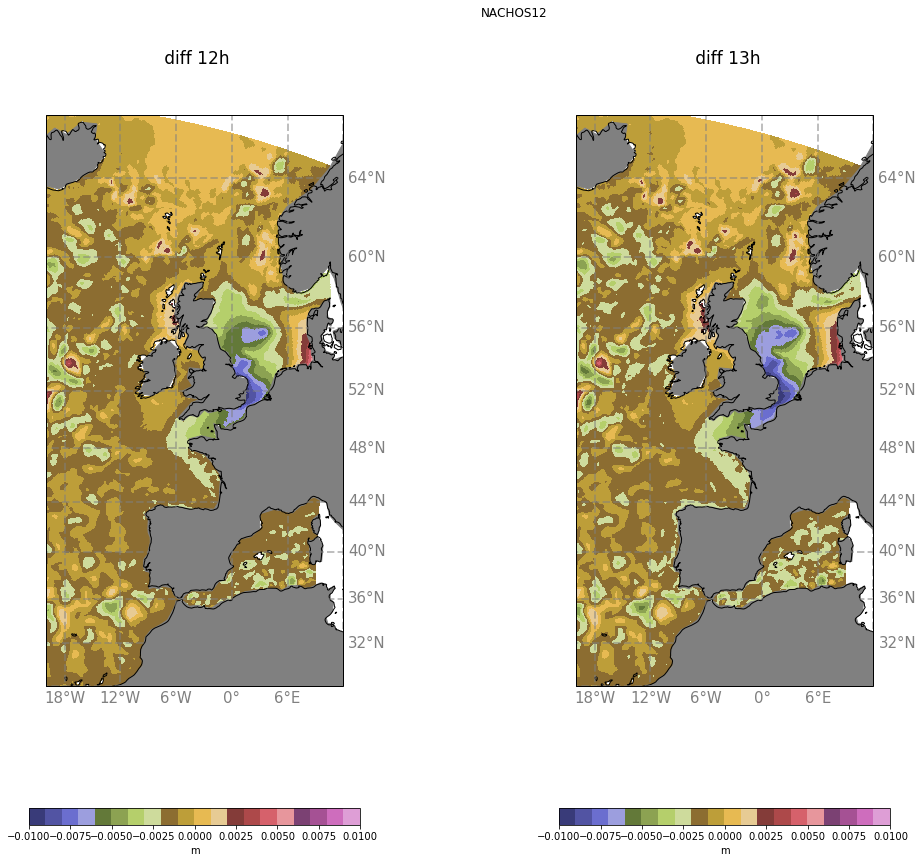

In [17]:
fig = plt.figure(figsize=(20,15))
plot_ibi_mercator(fig,121,np.nanmean(diff12hssh12,0),lat12,lon12,-0.01,0.01,'m',' diff 12h','tab20b')
plot_ibi_mercator(fig,122,np.nanmean(diff13hssh12,0),lat12,lon12,-0.01,0.01,'m',' diff 13h','tab20b')
plt.suptitle('NACHOS12')

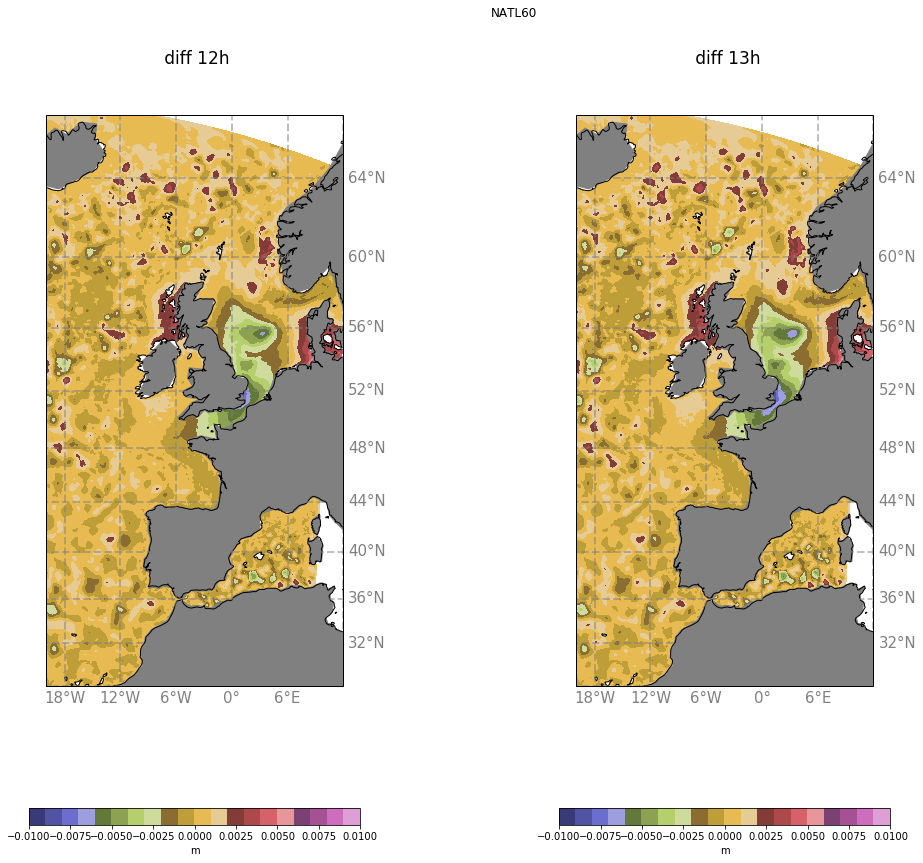

In [8]:
dir60='/media/extra/DATA/IBI/IBI60-CJM165-S/'
file60diff12h='IBI60-CJM165_y2013m01.1h_gridT_meandiff12h.nc'
tfile60diff12h=dir60+file60diff12h
ds60diff12h=xr.open_dataset(tfile60diff12h)

file60diff13h='IBI60-CJM165_y2013m01.1h_gridT_meandiff13h.nc'
tfile60diff13h=dir60+file60diff13h
ds60diff13h=xr.open_dataset(tfile60diff13h)

lon60=ds60diff12h.nav_lon
lat60=ds60diff12h.nav_lat
diff12hssh60=ds60diff12h.sossheig[0]
diff13hssh60=ds60diff13h.sossheig[0]

fig = plt.figure(figsize=(20,15))
plot_ibi_mercator(fig,121,diff12hssh60,lat60,lon60,-0.01,0.01,'m',' diff 12h','tab20b')
plot_ibi_mercator(fig,122,diff13hssh60,lat60,lon60,-0.01,0.01,'m',' diff 13h','tab20b')
plt.suptitle('NATL60')